# Hypothesis Testing

## Overview Exercises

Do your work for this exercise in a jupyter notebook named `hypothesis_testing.ipynb`.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.

### Is the website redesign any good?

**Null hypothesis:** 
User satisfaction scores will not imporove following webside redesign

**Alternate hypothesis:** 
User satisfaction scores will improve following website redesign

| | **$H_0$ is true** | **$H_0$ is false** |
| :--- | :--- | :--- |
| **Accept $H_0$** | *D'oh!* | Company moves forward with sucky website |
| **Reject $H_0$** | Company moves forward with newer sucky website | *Wheee!* |

### Is our television ad driving more sales?

**Null hypothesis:** 
Sales will not imporove following television ad airing

**Alternate hypothesis:** 
Sales will improve following our television ad airing

| | **$H_0$ is true** | **$H_0$ is false** |
| :--- | :--- | :--- |
| **Accept $H_0$** | *D'oh!* | Opportunity for gains lost | 
| **Reject $H_0$** | Somebody paid a lot of money for nothing | *Wheee!*|

### Has the network latency gone up since we switched internet service providers?

**Null hypothesis:** 
Network latency metrics will not imporove following switch

**Alternate hypothesis:** 
Network latency metrics will improve following switch

| | **$H_0$ is true** | **$H_0$ is false** |
| :--- | :--- | :--- |
| **Accept $H_0$** | *D'oh!* | Things stay crappy and people continue to complain |
| **Reject $H_0$** | Another somebody paid a lot of money for another nothing | *Wheee!*|

## T-Test Exercises

In [507]:
import numpy as np
import viz
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from scipy import stats
import math

In [508]:
#Functions:
def null_reject(p, alpha):
    reject = p <= alpha
    rej_ftr = '' if reject else 'FAIL TO '
    is_isnt = '' if reject else ' NOT'
    statement = f'{rej_ftr}REJECT the null hypothesis. There IS{is_isnt} a statistically significant difference'
    return reject, statement

### Ace Realty
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [509]:
#Office 1 = a, Office 2 = b, Both offices combined = pop

a_samples = 40
a_mean = 90
a_std_dev = 15
b_samples = 50
b_mean = 100
b_std_dev = 20
alpha = .05

a_std_dev_sq = a_std_dev ** 2
b_std_dev_sq = b_std_dev ** 2

a_dist = stats.norm(a_mean, a_std_dev)
b_dist = stats.norm(b_mean, b_std_dev)

# Null hypothesis: sales are same at each office

degf = a_samples + b_samples - 2

pop_std_dev = math.sqrt(((a_samples - 1) * a_std_dev_sq + (b_samples -1) * b_std_dev_sq) / degf)
pop_std_err = math.sqrt((a_std_dev_sq / a_samples) + (b_std_dev_sq / b_samples))

pop_t = abs(a_mean - b_mean) / (pop_std_dev * math.sqrt((1 / a_samples) + (1 / b_samples)))

print(f't = {pop_t:.5f}')

pop_p = stats.t(degf).sf(pop_t) * 2
print(f'p = {pop_p:.5f}')

reject, statement = null_reject(p=pop_p, alpha=alpha)
print(statement)


t = 2.62523
p = 0.01021
REJECT the null hypothesis. There IS a statistically significant difference


### mpg dataset
Load the mpg dataset and use it to answer the following questions:

In [510]:
from pydataset import data
mpg = data('mpg')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
92,ford,mustang,3.8,1999,6,auto(l4),r,18,25,r,subcompact
142,nissan,altima,2.4,1999,4,manual(m5),f,21,29,r,compact
140,mercury,mountaineer 4wd,4.6,2008,8,auto(l6),4,13,19,r,suv
56,dodge,dakota pickup 4wd,5.2,1999,8,manual(m5),4,11,17,r,pickup
76,ford,expedition 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv


In [511]:
mpg['mean_mpg'] = ((mpg.cty + mpg.hwy) / 2)
mpg['hwy_mpg_idx'] = round(100 * ((mpg.hwy / mpg.cty) - 1), 1)
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_mpg,hwy_mpg_idx
81,ford,explorer 4wd,4.0,2008,6,auto(l5),4,13,19,r,suv,16.0,46.2
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,61.1
146,nissan,altima,3.5,2008,6,manual(m6),f,19,27,p,midsize,23.0,42.1
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,55.0
120,hyundai,tiburon,2.7,2008,6,auto(l4),f,17,24,r,subcompact,20.5,41.2


- **Is there a difference in fuel-efficiency in cars from 2008 vs 1999?**

In [512]:
cars_1999 = pd.DataFrame(mpg[mpg.year == 1999])
# cars_1999.sample(5)
mpg_1999 = cars_1999.mean_mpg
n_1999 = mpg_1999.count()
mean_1999 = mpg_1999.mean()
std_dev_1999 = mpg_1999.std()
print(f'1999: {n_1999} cars, {mean_1999:.2f} average mpg, std_dev of {std_dev_1999:.3f}')

1999: 117 cars, 20.22 average mpg, std_dev of 5.208


In [513]:
cars_2008 = pd.DataFrame(mpg[mpg.year == 2008])
# cars_2008.sample(5)
mpg_2008 = cars_2008.mean_mpg
n_2008 = mpg_2008.count()
mean_2008 = mpg_2008.mean()
std_dev_2008 = mpg_2008.std()
print(f'2008: {n_2008} cars, {mean_2008:.2f} average mpg, std_dev of {std_dev_2008:.3f}')

2008: 117 cars, 20.08 average mpg, std_dev of 4.909


In [514]:
t, p = stats.ttest_ind(mpg_1999, mpg_2008)
print(f't = {t:.5f}, p = {p:.5f}')

reject, statement = null_reject(p=p, alpha=alpha)
print(statement)

t = 0.21960, p = 0.82637
FAIL TO REJECT the null hypothesis. There IS NOT a statistically significant difference


- **Are compact cars more fuel-efficient than the average car?**

In [515]:
cars_compact = pd.DataFrame(mpg[mpg['class'] == 'compact'])
cars_compact.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_mpg,hwy_mpg_idx
194,toyota,corolla,1.8,1999,4,auto(l3),f,24,30,r,compact,27.0,25.0
218,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact,25.0,38.1
15,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact,20.0,66.7
187,toyota,camry solara,2.2,1999,4,auto(l4),f,21,27,r,compact,24.0,28.6
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,61.1


In [516]:
mpg_compact = cars_compact.mean_mpg
n_compact = mpg_compact.count()
mean_compact = mpg_compact.mean()
std_dev_compact = mpg_compact.std()
print(f'Compacts: {n_compact} cars, {mean_compact:.2f} average mpg, std_dev of {std_dev_compact:.3f}')

Compacts: 47 cars, 24.21 average mpg, std_dev of 3.527


In [517]:
mpg_all = mpg.mean_mpg
n_all = mpg_all.count()
mean_all = mpg_all.mean()
std_dev_all = mpg_all.std()
print(f'All cars: {n_all} cars, {mean_all:.2f} average mpg, std_dev of {std_dev_all:.3f}')

All cars: 234 cars, 20.15 average mpg, std_dev of 5.050


In [518]:
t, p = stats.ttest_1samp(mpg_compact, mean_all)
print(f't = {t:.5f}, p = {p:.5f}')

reject, statement = null_reject(p=p, alpha=alpha)
print(statement)

t = 7.89689, p = 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


- **Do manual cars get better gas mileage than automatic cars?**

    $H_0$ There is no difference between the mileage of manual and automatic cars

In [519]:
cars_auto = pd.DataFrame(mpg[mpg.trans.str[:4] == 'auto'])
cars_auto.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_mpg,hwy_mpg_idx
48,dodge,caravan 2wd,4.0,2008,6,auto(l6),f,16,23,r,minivan,19.5,43.8
68,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,13,17,r,pickup,15.0,30.8
94,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact,20.0,50.0
164,subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv,23.0,30.0
133,land rover,range rover,4.4,2008,8,auto(s6),4,12,18,r,suv,15.0,50.0


In [520]:
cars_manual = pd.DataFrame(mpg[mpg.trans.str[:6] == 'manual'])
cars_manual.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_mpg,hwy_mpg_idx
96,ford,mustang,4.6,1999,8,manual(m5),r,15,22,r,subcompact,18.5,46.7
152,nissan,pathfinder 4wd,3.3,1999,6,manual(m5),4,15,17,r,suv,16.0,13.3
142,nissan,altima,2.4,1999,4,manual(m5),f,21,29,r,compact,25.0,38.1
201,toyota,toyota tacoma 4wd,2.7,1999,4,manual(m5),4,15,20,r,pickup,17.5,33.3
112,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize,26.0,47.6


In [521]:
mpg_auto = cars_auto.mean_mpg
n_auto = mpg_auto.count()
mean_auto = mpg_auto.mean()
std_dev_auto = mpg_auto.std()
print(f'Automatics: {n_auto} cars, {mean_auto:.2f} average mpg, std_dev of {std_dev_auto:.3f}')

Automatics: 157 cars, 19.13 average mpg, std_dev of 4.684


In [522]:
mpg_manual = cars_manual.mean_mpg
n_manual = mpg_manual.count()
mean_manual = mpg_manual.mean()
std_dev_manual = mpg_manual.std()
print(f'Mauals: {n_manual} cars, {mean_manual:.2f} average mpg, std_dev of {std_dev_manual:.3f}')

Mauals: 77 cars, 22.23 average mpg, std_dev of 5.161


In [523]:
t, p = stats.ttest_ind(mpg_auto, mpg_manual)
print(f't = {t:.5f}, p = {p:.5f}')

reject, statement = null_reject(p=p, alpha=alpha)
print(statement)

t = -4.59344, p = 0.00001
REJECT the null hypothesis. There IS a statistically significant difference


### Correlation Examples

**In-class Example:**
Is there a linear relationship between engine displacement and city mileage?

In [524]:
from pydataset import data
mpg = data('mpg')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
24,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
144,nissan,altima,2.5,2008,4,auto(av),f,23,31,r,midsize
37,chevrolet,malibu,3.6,2008,6,auto(s6),f,17,26,r,midsize
163,subaru,forester awd,2.5,2008,4,manual(m5),4,19,25,p,suv
225,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact


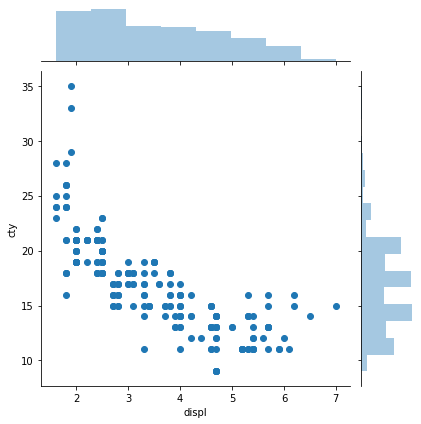

In [525]:
displ = mpg.displ
cty = mpg.cty
plots = pd.DataFrame(list(zip(displ, cty)), columns=['displ', 'cty'])
r, p = stats.pearsonr(displ, cty)
#plots.sample(5)
sns.jointplot(data=mpg, x=mpg.displ, y=mpg.cty)
plt.show()

In [526]:
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

These parameters have an r-value of -0.799 and p-value of 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


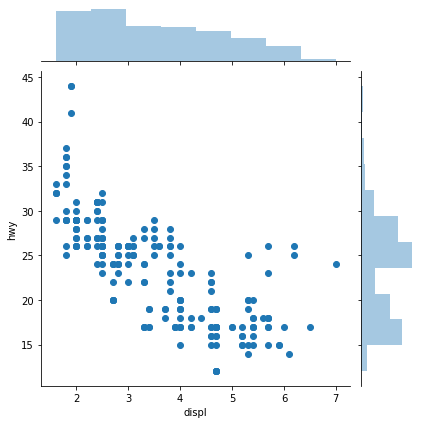

In [527]:
hwy = mpg.hwy
r, p = stats.pearsonr(displ, hwy)
sns.jointplot(data=mpg, x=mpg.displ, y=mpg.hwy)
plt.show()

In [528]:
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

These parameters have an r-value of -0.766 and p-value of 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


1. **Use the** `telco_churn` **data.**

In [529]:
from env import host, user, password
#url = f'mysql+pymysql://{user}:{password}@{host}/employees'
def get_db_url(user, password, host, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


In [603]:
telco_url = get_db_url(user, password, host, database='telco_churn')
customers = pd.read_sql('''
SELECT
    customer_id,
    gender,
    senior_citizen,
    partner,
    dependents,
    tenure,
    phone_service,
    multiple_lines,
    internet_service_type,
    online_security,
    online_backup,
    device_protection,
    tech_support,
    streaming_tv,
    streaming_movies,
    contract_type_id,
    paperless_billing,
    payment_type_id,
    cast(monthly_charges as decimal(11,2)) monthly_charges,
    cast((case when total_charges IS NULL then 0.00 else total_charges end) as decimal(11, 2)) total_charges,
    churn,
    (case when phone_service = 'Yes' then case when internet_service_type_id = 3 then 'phone only' else 'phone and internet' end else 'internet only' end) service_type
FROM
    customers
JOIN
    internet_service_types
    USING(internet_service_type_id)
''', telco_url)
#customers.total_charges = customers.total_charges.apply(lambda x: 0 if len(x.str) == 0 else x)
print(customers.shape)
print(customers.dtypes)
customers.sample(5)


(7043, 22)
customer_id               object
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
internet_service_type     object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
contract_type_id           int64
paperless_billing         object
payment_type_id            int64
monthly_charges          float64
total_charges            float64
churn                     object
service_type              object
dtype: object


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,service_type
4942,8062-YBDOE,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,1,Yes,1,69.65,69.65,Yes,phone and internet
1741,7162-WPHPM,Male,0,Yes,Yes,58,Yes,Yes,DSL,Yes,...,Yes,No,No,3,No,4,71.60,4230.25,No,phone and internet
4711,7274-RTAPZ,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,Yes,1,Yes,1,90.55,90.55,Yes,phone and internet
3725,4187-CINZD,Female,1,No,No,46,Yes,No,Fiber optic,No,...,No,Yes,Yes,2,No,4,95.25,4424.20,Yes,phone and internet
5040,8421-WZOOW,Female,1,Yes,Yes,57,Yes,No,Fiber optic,No,...,Yes,Yes,No,1,Yes,4,95.30,5567.45,No,phone and internet


- **Does tenure correlate with monthly charges?**

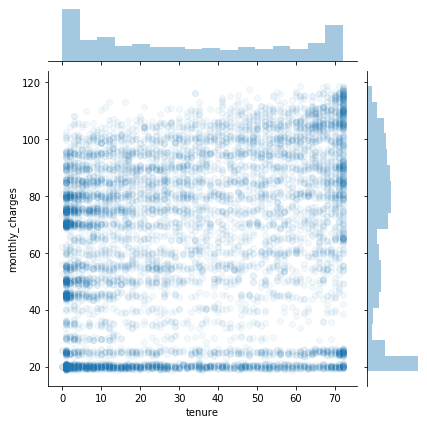

These parameters have an r-value of 0.248 and p-value of 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


In [604]:
r, p = stats.pearsonr(customers.tenure, customers.monthly_charges)
sns.jointplot(data=customers, x=customers.tenure, y=customers.monthly_charges, alpha=.05)
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

- **Total charges?** 

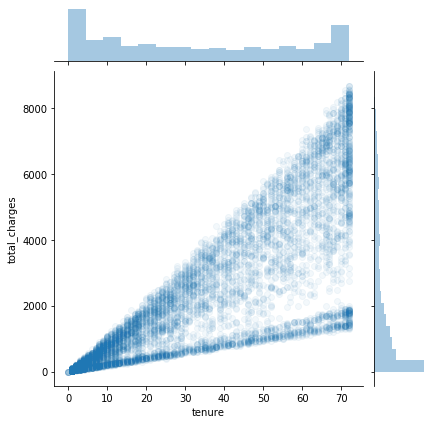

These parameters have an r-value of 0.826 and p-value of 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


In [605]:
r, p = stats.pearsonr(customers.tenure, customers.total_charges)
sns.jointplot(data=customers, x=customers.tenure, y=customers.total_charges, alpha=.05)
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

- **What happens if you control for phone and internet service**

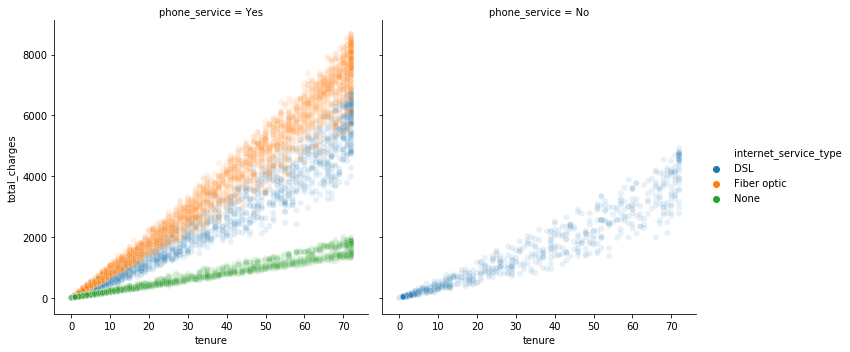

In [609]:
r, p = stats.pearsonr(customers.tenure, customers.total_charges)
sns.relplot(data=customers, x='tenure', y='total_charges', hue='internet_service_type', col='phone_service', alpha=.1)
plt.show()

In [613]:
customers_po = customers[customers.service_type == 'phone only']
print(customers_po.shape)
customers_pi = customers[customers.service_type == 'phone and internet']
print(customers_pi.shape)
customers_io = customers[customers.service_type == 'internet only']
print(customers_io.shape)
customers_fo = customers[customers.internet_service_type == 'Fiber optic']
print(customers_fo.shape)

(1526, 22)
(4835, 22)
(682, 22)
(3096, 22)


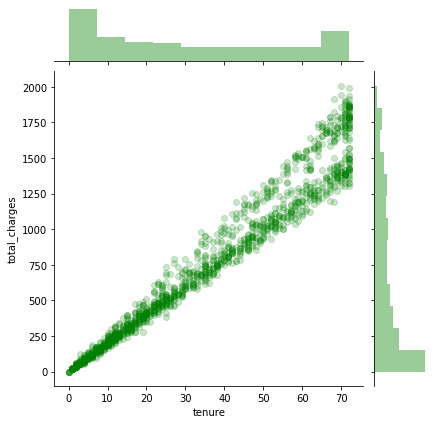

These parameters have an r-value of 0.982 and p-value of 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


In [610]:
r, p = stats.pearsonr(customers_po.tenure, customers_po.total_charges)
ax1 = sns.jointplot(data=customers_po, x=customers_po.tenure, y=customers_po.total_charges, color='g', alpha=.2)
ax1.title = 'Phone Only'
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

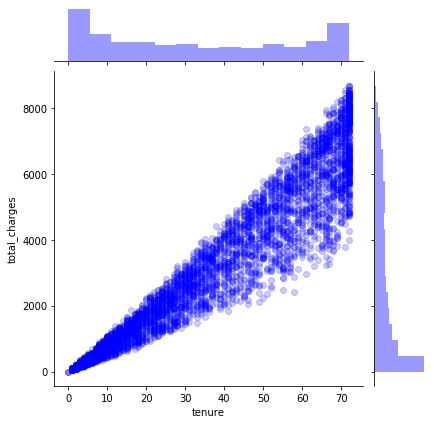

These parameters have an r-value of 0.958 and p-value of 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


In [611]:
r, p = stats.pearsonr(customers_pi.tenure, customers_pi.total_charges)
sns.jointplot(data=customers_pi, x=customers_pi.tenure, y=customers_pi.total_charges, color='blue', alpha=.2)
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

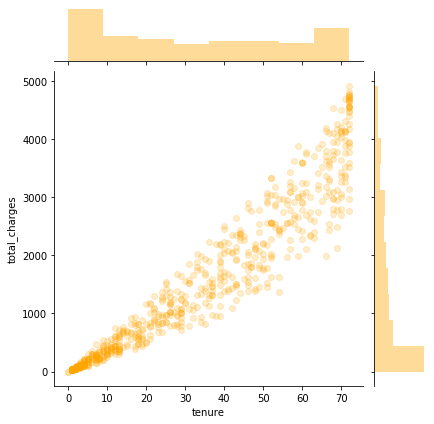

These parameters have an r-value of 0.954 and p-value of 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


In [612]:
r, p = stats.pearsonr(customers_io.tenure, customers_io.total_charges)
sns.jointplot(data=customers_io, x=customers_io.tenure, y=customers_io.total_charges, color='orange', alpha=.2)
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

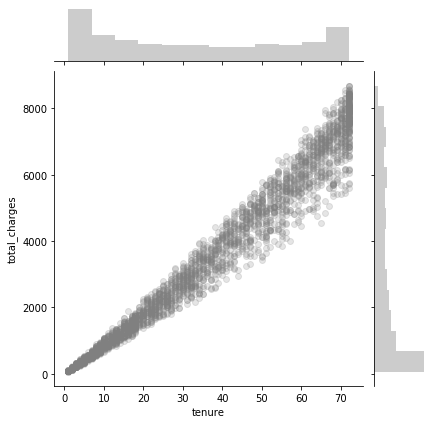

These parameters have an r-value of 0.985 and p-value of 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


In [614]:
r, p = stats.pearsonr(customers_fo.tenure, customers_fo.total_charges)
sns.jointplot(data=customers_fo, x=customers_fo.tenure, y=customers_fo.total_charges, color='gray', alpha=.2)
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

2. **Use the** `employees` **database.**

In [407]:
employees_url = get_db_url(user, password, host, database='employees')
str_to_date = '''SET @check_date =  STR_TO_DATE('2002-09-30', '%Y-%m-%d');''' 

employees = pd.read_sql('''SELECT
    e.*,
    datediff('2002-08-01', e.hire_date) tenure,
    t.title,
    t.from_date title_from,
    datediff('2002-08-01', t.from_date) t_tenure,
    et.titles,
    s.salary,
    s.from_date salary_from,
    datediff('2002-08-01', s.from_date) s_tenure,
    es.salaries,
    d.dept_name,
    de.from_date dept_from,
    datediff('2002-08-01', de.from_date) de_tenure,
    (case when dm.mngr IS NULL then 'No' else 'Yes' end) is_manager,
    (case when dm.mngr IS NULL then 'Never' else dm.mngr end) manager_status
FROM
    employees e
JOIN 
    titles t 
    USING(emp_no)
JOIN 
    salaries s 
    USING(emp_no)
JOIN
    (SELECT 
        emp_no,
        count(*) titles
    FROM
        titles
    GROUP BY
        emp_no) et
    USING(emp_no)
JOIN
    (SELECT 
        emp_no,
        count(*) salaries
    FROM
        salaries
    GROUP BY
        emp_no) es
    USING(emp_no)
JOIN
    dept_emp de
    USING(emp_no)
JOIN
    departments d
    USING(dept_no)
LEFT JOIN
    (SELECT
        emp_no,
        (case when to_date > now() then 'Current' else 'Former' end) mngr
    FROM
        dept_manager
    GROUP BY
        emp_no,
        (case when to_date > now() then 'Current' else 'Former' end)        
    ) dm
    USING(emp_no)
WHERE
    s.to_date > '2002-08-01'
    AND t.to_date > '2002-08-01'
    AND de.to_date > '2002-08-01';
''', employees_url)
print(employees.shape)
print(employees.dtypes)
employees.sample(5)

(240124, 20)
emp_no             int64
birth_date        object
first_name        object
last_name         object
gender            object
hire_date         object
tenure             int64
title             object
title_from        object
t_tenure           int64
titles             int64
salary             int64
salary_from       object
s_tenure           int64
salaries           int64
dept_name         object
dept_from         object
de_tenure          int64
is_manager        object
manager_status    object
dtype: object


,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure,title,title_from,t_tenure,titles,salary,salary_from,s_tenure,salaries,dept_name,dept_from,de_tenure,is_manager,manager_status
205612,456778,1960-01-09,Baruch,Puppo,M,1991-07-27,4023,Senior Engineer,2000-07-26,736,2,61259,2002-07-24,8,12,Development,1991-07-27,4023,No,Never
66770,93285,1964-01-18,Lubomir,Cooman,F,1985-09-18,6161,Senior Staff,1988-04-11,5225,1,84375,2002-04-08,115,15,Human Resources,1988-04-11,5225,No,Never
158679,298110,1961-06-23,Bader,Junot,M,1985-10-13,6136,Senior Engineer,1991-10-13,3945,2,85850,2001-10-09,296,17,Development,1985-10-13,6136,No,Never
171745,414484,1959-08-02,Bernardo,Bage,M,1986-10-05,5779,Senior Staff,1996-03-09,2336,2,77803,2002-03-06,148,16,Research,1987-03-10,5623,No,Never
42974,63540,1964-01-02,Ger,Papsdorf,M,1991-12-02,3895,Technique Leader,1991-12-02,3895,1,60023,2001-11-29,245,11,Production,1991-12-02,3895,No,Never


- **Is there a relationship between how long an employee has been with the company and their salary?**

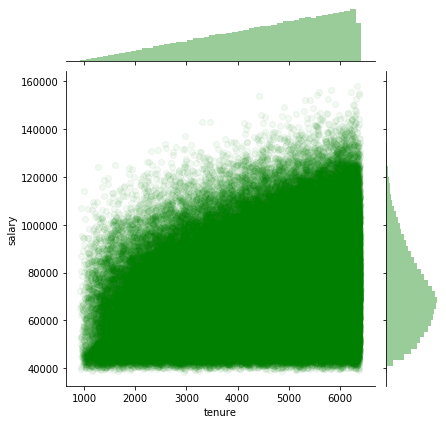

These parameters have an r-value of 0.306 and p-value of 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


In [598]:
r, p = stats.pearsonr(employees.tenure, employees.salary)
sns.jointplot(data=employees, x=employees.tenure, y=employees.salary, color='green', alpha=.05)
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

- **Is there a relationship between how long an employee has been with the company and the number of titles they have had?**

titles
1    111892
2    125345
3      2887
Name: emp_no, dtype: int64


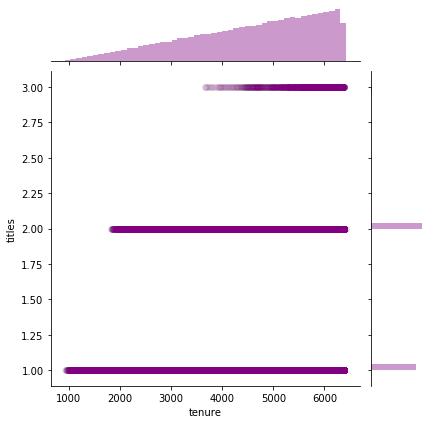

These parameters have an r-value of 0.287 and p-value of 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


In [596]:
r, p = stats.pearsonr(employees.tenure, employees.titles)
print(employees.groupby('titles').emp_no.count())
sns.jointplot(data=employees, x=employees.tenure, y=employees.titles, color='purple', alpha=.01)
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

          count  min  max         std        mean  median
salaries                                                 
3          8033  182  364   52.642992  273.460351     273
4         15692    0  364  106.011056  182.353237     183
5         16086    0  364  105.491521  182.952630     184
6         15904    0  364  105.740707  182.098717     182
7         15898    0  364  105.130853  180.609511     181
8         16056    0  364  105.576298  181.048393     180
9         15968    0  364  105.143079  182.097007     183
10        16088    0  364  105.096997  182.357844     182
11        16054    0  364  105.638120  181.807525     181
12        15949    0  364  105.333889  183.663427     184
13        16067    0  364  105.115020  182.257298     182
14        16270    0  364  105.498518  181.027167     181
15        16108    0  364  105.105371  182.715483     184
16        15886    0  364  105.931834  182.258655     183
17        15909    0  364  105.854243  183.128481     183
18         815

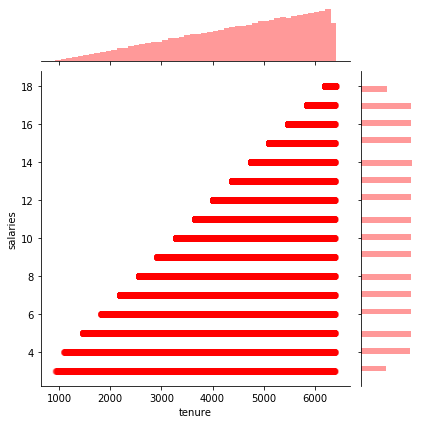

These parameters have an r-value of 0.610 and p-value of 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


In [599]:
r, p = stats.pearsonr(employees.tenure, employees.salaries)
print(employees.groupby('salaries').s_tenure.agg(['count', 'min', 'max', 'std', 'mean', 'median']))
print(employees.groupby('salaries').tenure.agg(['count', 'min', 'max', 'std', 'mean', 'median']))
sns.jointplot(data=employees, x=employees.tenure, y=employees.salaries, color='red', alpha=.05)
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

3 **Use the** 
`sleepstudy` 
 **data.** 

In [396]:
sleep = data('sleepstudy')
print(sleep.shape)
print(sleep.dtypes)
sleep.sample(5)

(180, 3)
Reaction    float64
Days          int64
Subject       int64
dtype: object


,Reaction,Days,Subject
180,364.1236,9,372
22,194.3322,1,310
86,254.6362,5,335
5,356.8519,4,308
58,346.8311,7,332


- **Is there a relationship between days and reaction time?**

           min       max        mean        std
Days                                           
0     199.0539  321.5426  256.651806  32.129451
1     194.3322  313.8058  264.495756  33.430334
2     202.9778  326.8785  265.361900  29.473423
3     204.7070  346.8555  282.992011  38.857738
4     207.7161  365.7324  288.649422  42.537887
5     215.9618  414.6901  308.518456  51.769625
6     213.6303  454.1619  312.178256  63.173720
7     217.7272  416.6923  318.750583  50.103963
8     224.2957  455.8643  336.629506  60.199716
9     237.2466  466.3535  350.851222  66.986155


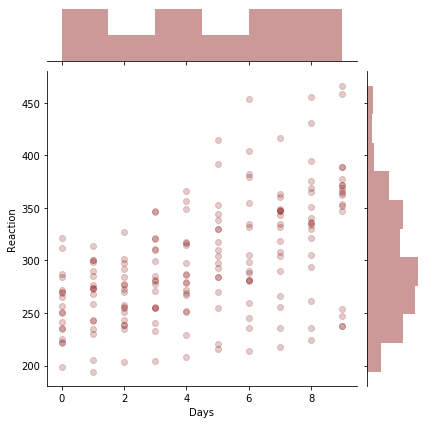

These parameters have an r-value of 0.535 and p-value of 0.00000
REJECT the null hypothesis. There IS a statistically significant difference


In [600]:
r, p = stats.pearsonr(sleep.Days, sleep.Reaction)
print(sleep.groupby('Days').Reaction.agg(['min','max','mean','std']))
sns.jointplot(data=sleep, x=sleep.Days, y=sleep.Reaction, color='maroon', alpha=.2)
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

### $\chi^2$ Examples

1. **Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.**

| |Codeup Student|Not Codeup Student|
| :--- | :--: | :--: |
|Uses a Macbook|49|20|
|Doesn't Use A Macbook|1|30|

In [398]:
index = ['Codeup Student', 'Not Codeup Student']
columns = ['Uses a Macbook', 'Does Not Use A Macbook']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

,Uses a Macbook,Does Not Use A Macbook
Codeup Student,49,20
Not Codeup Student,1,30


In [399]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'chi2: {chi2}, p: {p:.5f}, degf: {degf}\nExpected')
pd.DataFrame(expected, index=index, columns=columns)

chi2: 36.653, p: 0.00000, degf: 1
Expected


,Uses a Macbook,Does Not Use A Macbook
Codeup Student,34.5,34.5
Not Codeup Student,15.5,15.5


In [400]:
reject, statement = null_reject(p, alpha)
print(statement)

REJECT the null hypothesis. There IS a statistically significant difference


2. **Choose another 2 categorical variables from the mpg dataset and perform a $\chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.**

**Variables chosen:** 
class and cylinders (cyl)

    
$H_0$: cylinders is independant of class

$H_1$: cylinders is not independant of class

In [592]:
observed_mpg = pd.crosstab(mpg['class'], mpg.cyl)
index=observed_mpg.index
columns=observed_mpg.columns
observed_mpg

cyl,4,5,6,8
class,,,,
2seater,0,0,0,5
compact,32,2,13,0
midsize,16,0,23,2
minivan,1,0,10,0
pickup,3,0,10,20
subcompact,21,2,7,5
suv,8,0,16,38


In [593]:
chi2, p, degf, expected_mpg = stats.chi2_contingency(observed_mpg)
print(f'chi2: {chi2:.3f}, p: {p:.5f}, degf: {degf}\nExpected')
pd.DataFrame(expected_mpg, index=index, columns=columns)

chi2: 138.028, p: 0.00000, degf: 18
Expected


cyl,4,5,6,8
class,,,,
2seater,1.730769,0.085470,1.688034,1.495726
compact,16.269231,0.803419,15.867521,14.059829
midsize,14.192308,0.700855,13.841880,12.264957
minivan,3.807692,0.188034,3.713675,3.290598
pickup,11.423077,0.564103,11.141026,9.871795
subcompact,12.115385,0.598291,11.816239,10.470085
suv,21.461538,1.059829,20.931624,18.547009


In [506]:
reject, statement = null_reject(p, alpha)
print(statement)

REJECT the null hypothesis. There IS a statistically significant difference


3. **Use the data from the employees database to answer these questions:**

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [589]:
crosstab_gd = pd.crosstab(employees.dept_name, employees.gender)
index=crosstab_gd.index
columns=crosstab_gd.columns
crosstab_gd

gender,F,M
dept_name,,
Customer Service,7007,10562
Development,24533,36853
Finance,5014,7423
Human Resources,5147,7751
Marketing,5864,8978
Production,21393,31911
Quality Management,5872,8674
Research,6181,9260
Sales,14999,22702


In [590]:
chi2, p, degf, expected_gd = stats.chi2_contingency(crosstab_gd)
print(f'chi2: {chi2:.3f}, p: {p:.5f}, degf: {degf}\nExpected')
pd.DataFrame(expected_gd, index=index, columns=columns)

chi2: 4.115, p: 0.84658, degf: 8
Expected


gender,F,M
dept_name,,
Customer Service,7024.702612,10544.297388
Development,24544.276540,36841.723460
Finance,4972.748955,7464.251045
Human Resources,5157.072929,7740.927071
Marketing,5934.352335,8907.647665
Production,21312.809382,31991.190618
Quality Management,5816.001149,8729.998851
Research,6173.853551,9267.146449
Sales,15074.182547,22626.817453


In [494]:
reject, statement = null_reject(p, alpha)
print(statement)

FAIL TO REJECT the null hypothesis. There IS NOT a statistically significant difference


- **Is an employee's gender independent of whether or not they are or have been a manager?**

In [587]:
crosstab_gm = pd.crosstab(employees.is_manager, employees.gender)
index=crosstab_gm.index
columns=crosstab_gm.columns
crosstab_gm

gender,F,M
is_manager,,
No,95997,144103
Yes,13,11


In [588]:
chi2, p, degf, expected_gm = stats.chi2_contingency(crosstab_gm)
print(f'chi2: {chi2:.3f}, p: {p:.5f}, degf: {degf}\nExpected')
pd.DataFrame(expected_gm, index=index, columns=columns)

chi2: 1.464, p: 0.22623, degf: 1
Expected


gender,F,M
is_manager,,
No,96000.403958,144099.596042
Yes,9.596042,14.403958


In [499]:
reject, statement = null_reject(p, alpha)
print(statement)

FAIL TO REJECT the null hypothesis. There IS NOT a statistically significant difference


### Self-guided investigations

1. **Sakila database**

In [541]:
sakila_url = get_db_url(user, password, host, database='sakila')

#### Rentals query

In [543]:
rentals = pd.read_sql('''select
	r.rental_id,
	r.rental_date,
	(case when r.return_date is null then false else true end) is_open,
	cust.customer_id,
	concat(cust.last_name, ', ', cust.first_name) cust_name,
	custa.cust_ctry,
	custs.cust_store_ctry,
	f.film_id,
	f.title,
	r.staff_id,
	re.rental_employee,
	re.rental_ctry,
	i.inventory_id,
	p.payment_id,
	p.payment_date,
	p.amount,
	p.staff_id,
	pe.payment_employee,
	pe.payment_ctry,
	(case when r.return_date is null then adddate(r.rental_date, interval f.rental_duration day) else r.return_date end) return_date,
	(case when r.return_date is null then f.rental_duration else datediff(r.return_date, r.rental_date) end) rental_days,
	f.description,
	f.release_year,
	f.rental_duration,
	f.rental_rate,
	f.length,
	f.replacement_cost,
	f.rating,
	l.name `language`,
	cat.name`category`,
	cust.email,
	cust.active,
	custa.cust_city,
	custa.cust_dist,
	invs.inv_ctry
from
	rental r
join
	inventory i
	using(inventory_id)
join
	customer cust
	using(customer_id)
join
	film f
	using(film_id)
join
	language l
	using(language_id)
join
	film_category fc
	using(film_id)
join
	category cat
	using(category_id)
join
	payment p
	using(rental_id) 
	
left join
	(select
		cust.address_id,
		city.city cust_city,
		a.district cust_dist,
		ctry.country cust_ctry
	from
		customer cust
	join
		address a 
		using(address_id)
	join
		city 
		using(city_id)
	join
		country ctry
		using(country_id)
	) custa
	on cust.address_id = custa.address_id
	
left join
	(select
	s.store_id,
	ctry.country cust_store_ctry
	from
		store s
	join
		address a 
		using(address_id)
	join
		city 
		using(city_id)
	join
		country ctry
		using(country_id)
	) custs
	on cust.store_id = custs.store_id
	
left join
	(select
	s.store_id,
	ctry.country inv_ctry
	from
		store s
	join
		address a 
		using(address_id)
	join
		city 
		using(city_id)
	join
		country ctry
		using(country_id)
	) invs
	on i.store_id = invs.store_id

left join
	(select
	e.staff_id,
	e.last_name rental_employee,
	ctry.country rental_ctry
	from
		staff e		
	join
		address a 
		using(address_id)
	join
		city 
		using(city_id)
	join
		country ctry
		using(country_id)
	) re
	on r.staff_id = re.staff_id

left join
	(select
	e.staff_id,
	e.last_name payment_employee,
	ctry.country payment_ctry
	from
		staff e		
	join
		address a 
		using(address_id)
	join
		city 
		using(city_id)
	join
		country ctry
		using(country_id)
	) pe
	on r.staff_id = pe.staff_id''', sakila_url)

print(rentals.shape)
print(rentals.dtypes)
rentals.sample(15)

(16044, 35)
rental_id                    int64
rental_date         datetime64[ns]
is_open                      int64
customer_id                  int64
cust_name                   object
cust_ctry                   object
cust_store_ctry             object
film_id                      int64
title                       object
staff_id                     int64
rental_employee             object
rental_ctry                 object
inventory_id                 int64
payment_id                   int64
payment_date        datetime64[ns]
amount                     float64
staff_id                     int64
payment_employee            object
payment_ctry                object
return_date         datetime64[ns]
rental_days                  int64
description                 object
release_year                 int64
rental_duration              int64
rental_rate                float64
length                       int64
replacement_cost           float64
rating                      object
language

,rental_id,rental_date,is_open,customer_id,cust_name,cust_ctry,cust_store_ctry,film_id,title,staff_id,...,length,replacement_cost,rating,language,category,email,active,cust_city,cust_dist,inv_ctry
6645,11061,2005-08-02 06:50:18,1,245,"DAY, COURTNEY",South Korea,Canada,176,CONGENIALITY QUEST,2,...,87,21.99,PG-13,English,Sports,COURTNEY.DAY@sakilacustomer.org,1,Uijongbu,Kyonggi,Canada
8040,13991,2005-08-20 19:29:44,1,296,"HALE, RAMONA",India,Australia,429,HONEY TIES,1,...,84,29.99,R,English,Sports,RAMONA.HALE@sakilacustomer.org,1,Patiala,Punjab,Australia
4634,2788,2005-06-19 18:48:11,1,171,"WAGNER, DOLORES",Malaysia,Australia,319,FISH OPUS,1,...,125,22.99,R,English,Sci-Fi,DOLORES.WAGNER@sakilacustomer.org,1,Ipoh,Perak,Australia
13173,9532,2005-07-31 01:16:51,1,488,"MILLARD, SHANE",Mexico,Australia,288,ESCAPE METROPOLIS,1,...,167,20.99,R,English,Travel,SHANE.MILLARD@sakilacustomer.org,1,La Paz,Baja California Sur,Australia
9044,4032,2005-07-07 02:34:13,1,335,"MAULDIN, GREGORY",Tunisia,Canada,576,MIGHTY LUCK,1,...,122,13.99,PG,English,Documentary,GREGORY.MAULDIN@sakilacustomer.org,1,Sousse,Sousse,Australia
682,15972,2005-08-23 20:00:30,1,25,"WALKER, DEBORAH",Pakistan,Canada,968,WEREWOLF LOLA,1,...,79,19.99,G,English,Action,DEBORAH.WALKER@sakilacustomer.org,1,Shikarpur,Sind,Canada
15154,2367,2005-06-18 14:00:31,1,566,"MENA, CASEY",Turkey,Canada,890,TIGHTS DAWN,2,...,172,14.99,R,English,Sports,CASEY.MENA@sakilacustomer.org,1,Tokat,Tokat,Australia
4720,2326,2005-06-18 10:14:22,1,174,"WATKINS, YVONNE",Venezuela,Australia,838,STAGECOACH ARMAGEDDON,2,...,112,25.99,R,English,Action,YVONNE.WATKINS@sakilacustomer.org,1,Ocumare del Tuy,Miranda,Australia
1954,11422,2005-08-02 19:52:08,1,72,"WATSON, THERESA",Philippines,Australia,76,BIRDCAGE CASPER,2,...,103,23.99,NC-17,English,Music,THERESA.WATSON@sakilacustomer.org,1,Taguig,National Capital Reg,Canada
10383,11122,2005-08-02 08:49:09,1,383,"BALES, MARTIN",Angola,Canada,663,PATIENT SISTER,1,...,99,29.99,NC-17,English,Classics,MARTIN.BALES@sakilacustomer.org,1,Namibe,Namibe,Australia


#### Films query

In [629]:
films = pd.read_sql('''select
	f.film_id,
	f.title,
	f.description,
	f.release_year,
	f.rental_duration,
	f.rental_rate,
	f.length,
	f.replacement_cost,
	f.rating,
	l.name `language`,
	cat.name category,
	fa.actors,
    fi.copies,
    fi.copies_can,
    fi.copies_aus,
    fr.rentals,
    fr.rentals_can,
    fr.rentals_aus,
    (f.rating in ('NC-17','R')) is_adult
from
	film f
join
	language l
	using(language_id)
join
	film_category fc
	using(film_id)
join
	category cat
	using(category_id)
join
    (select
        i.film_id,
        count(*) copies,
        sum(case when i.store_id = 1 then 1 else 0 end) copies_can,
        sum(case when i.store_id = 2 then 1 else 0 end) copies_aus
    from
        inventory i
    group by
        i.film_id
    ) fi
    using(film_id)
join
    (select
        i.film_id,
        count(*) rentals,
        sum(case when i.store_id = 1 then 1 else 0 end) rentals_can,
        sum(case when i.store_id = 2 then 1 else 0 end) rentals_aus
    from
        rental r
    join
        inventory i
        using(inventory_id)
    group by
        i.film_id
    ) fr
    using(film_id)
join    
    (select
    	film_id,
    	count(*) actors
    from
    	film_actor
    group by
    	film_id
    ) fa
    using(film_id)
''', sakila_url)

print(films.shape)
print(films.dtypes)
films.sample(15)

(955, 19)
film_id               int64
title                object
description          object
release_year          int64
rental_duration       int64
rental_rate         float64
length                int64
replacement_cost    float64
rating               object
language             object
category             object
actors                int64
copies                int64
copies_can          float64
copies_aus          float64
rentals               int64
rentals_can         float64
rentals_aus         float64
is_adult              int64
dtype: object


,film_id,title,description,release_year,rental_duration,rental_rate,length,replacement_cost,rating,language,category,actors,copies,copies_can,copies_aus,rentals,rentals_can,rentals_aus,is_adult
701,736,ROBBERY BRIGHT,A Taut Reflection of a Robot And a Squirrel who must Fight a Boat in Ancient Japan,2006,4,0.99,134,21.99,R,English,Family,2,4,4.0,0.0,13,13.0,0.0,1
639,670,PELICAN COMFORTS,A Epic Documentary of a Boy And a Monkey who must Pursue a Astronaut in Berlin,2006,4,4.99,48,17.99,PG,English,Documentary,5,7,4.0,3.0,26,14.0,12.0,0
330,352,GATHERING CALENDAR,A Intrepid Tale of a Pioneer And a Moose who must Conquer a Frisbee in A MySQL Convention,2006,4,0.99,176,22.99,PG-13,English,Games,3,4,0.0,4.0,11,0.0,11.0,0
247,265,DYING MAKER,A Intrepid Tale of a Boat And a Monkey who must Kill a Cat in California,2006,5,4.99,168,28.99,PG,English,Comedy,2,4,4.0,0.0,17,17.0,0.0,0
657,689,POLLOCK DELIVERANCE,A Intrepid Story of a Madman And a Frisbee who must Outgun a Boat in The Sahara Desert,2006,5,2.99,137,14.99,PG,English,Foreign,6,6,4.0,2.0,18,13.0,5.0,0
594,623,NEWTON LABYRINTH,A Intrepid Character Study of a Moose And a Waitress who must Find a A Shark in Ancien...,2006,4,0.99,75,9.99,PG,English,Foreign,4,5,2.0,3.0,17,6.0,11.0,0
106,114,CAMELOT VACATION,A Touching Character Study of a Woman And a Waitress who must Battle a Pastry Chef in ...,2006,3,0.99,61,26.99,NC-17,English,Sci-Fi,2,7,4.0,3.0,27,16.0,11.0,1
690,725,REQUIEM TYCOON,A Unbelieveable Character Study of a Cat And a Database Administrator who must Pursue ...,2006,6,4.99,167,25.99,R,English,Classics,8,6,3.0,3.0,19,10.0,9.0,1
264,282,ENCOUNTERS CURTAIN,A Insightful Epistle of a Pastry Chef And a Womanizer who must Build a Boat in New Orl...,2006,5,0.99,92,20.99,NC-17,English,Drama,4,6,3.0,3.0,19,10.0,9.0,1
68,74,BIRCH ANTITRUST,A Fanciful Panorama of a Husband And a Pioneer who must Outgun a Dog in A Baloon,2006,4,4.99,162,18.99,PG,English,Music,6,5,3.0,2.0,11,6.0,5.0,0


- **Is rental country independant from inventory country?**

**$H_0$:** Country of rental is not dependant on country with inventory

In [585]:
crosstab_ric = pd.crosstab(rentals.rental_ctry, rentals.inv_ctry)
index=crosstab_ric.index
columns=crosstab_ric.columns
crosstab_ric

inv_ctry,Australia,Canada
rental_ctry,,
Australia,4072,3932
Canada,4049,3991


In [586]:
chi2, p, degf, expected_ric = stats.chi2_contingency(crosstab_ric)
print(f'chi2: {chi2:.3f}, p: {p:.5f}, degf: {degf}\nExpected')
pd.DataFrame(expected_ric, index=index, columns=columns)

chi2: 0.403, p: 0.52533, degf: 1
Expected


inv_ctry,Australia,Canada
rental_ctry,,
Australia,4051.38893,3952.61107
Canada,4069.61107,3970.38893


In [554]:
reject, statement = null_reject(p, alpha)
print(statement)

FAIL TO REJECT the null hypothesis. There IS NOT a statistically significant difference


- **Does rental rate correlate with replacement cost?**

**$H_0$:** Rental rate is not related to replacement cost

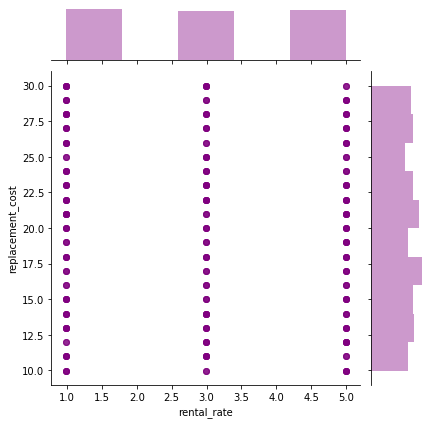

These parameters have an r-value of -0.052 and p-value of 0.10707
FAIL TO REJECT the null hypothesis. There IS NOT a statistically significant difference


In [623]:
r, p = stats.pearsonr(films.rental_rate, films.replacement_cost)
sns.jointplot(data=films, x=films.rental_rate, y=films.replacement_cost, color='purple', alpha=.2)
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

- **Does customer country relate to rental country?**

**$H_0:$ Customer country and rental country are independant

In [582]:
crosstab_crc = pd.crosstab(rentals.cust_ctry, rentals.rental_ctry)
index=crosstab_crc.index
columns=crosstab_crc.columns
crosstab_crc

rental_ctry,Australia,Canada
cust_ctry,,
Afghanistan,14,4
Algeria,45,45
American Samoa,9,11
Angola,23,29
Anguilla,18,17
Argentina,171,181
Armenia,15,10
Austria,43,35
Azerbaijan,34,23


In [583]:
chi2, p, degf, expected_crc = stats.chi2_contingency(crosstab_crc)
print(f'chi2: {chi2:.3f}, p: {p:.5f}, degf: {degf}\nExpected')
pd.DataFrame(expected_crc, index=index, columns=columns)

chi2: 102.953, p: 0.59270, degf: 107
Expected


rental_ctry,Australia,Canada
cust_ctry,,
Afghanistan,8.979806,9.020194
Algeria,44.899028,45.100972
American Samoa,9.977562,10.022438
Angola,25.941660,26.058340
Anguilla,17.460733,17.539267
Argentina,175.605086,176.394914
Armenia,12.471952,12.528048
Austria,38.912491,39.087509
Azerbaijan,28.436051,28.563949


In [561]:
reject, statement = null_reject(p, alpha)
print(statement)

FAIL TO REJECT the null hypothesis. There IS NOT a statistically significant difference


- **Does customer store country relate to rental country?**

**$H_0:$ Customer store country and rental country are independant

In [577]:
crosstab_csrc = pd.crosstab(rentals.cust_store_ctry, rentals.rental_ctry)
index=crosstab_csrc.index
columns=crosstab_csrc.columns
crosstab_csrc

rental_ctry,Australia,Canada
cust_store_ctry,,
Australia,3615,3682
Canada,4389,4358


In [580]:
chi2, p, degf, expected_csrc = stats.chi2_contingency(crosstab_csrc)
print(f'chi2: {chi2:.3f}, p: {p:.5f}, degf: {degf}\nExpected')
pd.DataFrame(expected_csrc, index=index, columns=columns)

chi2: 0.619, p: 0.43139, degf: 1
Expected


rental_ctry,Australia,Canada
cust_store_ctry,,
Australia,3640.313388,3656.686612
Canada,4363.686612,4383.313388


In [574]:
reject, statement = null_reject(p, alpha)
print(statement)

FAIL TO REJECT the null hypothesis. There IS NOT a statistically significant difference


- **Does rating relate to category?**

**$H_0:$ Rating and category are independant

In [627]:
crosstab_ratcat = pd.crosstab(films.category, films.rating)
index=crosstab_ratcat.index
columns=crosstab_ratcat.columns
crosstab_ratcat

rating,G,NC-17,PG,PG-13,R
category,,,,,
Action,17,11,8,11,14
Animation,13,15,11,17,8
Children,10,12,14,13,9
Classics,11,8,8,13,14
Comedy,11,10,15,12,8
Documentary,13,13,15,10,12
Drama,12,15,7,21,5
Family,9,14,17,11,16
Foreign,12,10,13,19,13


In [628]:
chi2, p, degf, expected_ratcat = stats.chi2_contingency(crosstab_ratcat)
print(f'chi2: {chi2:.3f}, p: {p:.5f}, degf: {degf}\nExpected')
pd.DataFrame(expected_ratcat, index=index, columns=columns)

chi2: 66.153, p: 0.27292, degf: 60
Expected


rating,G,NC-17,PG,PG-13,R
category,,,,,
Action,10.858639,12.902618,11.689005,13.605236,11.944503
Animation,11.392670,13.537173,12.263874,14.274346,12.531937
Children,10.324607,12.268063,11.114136,12.936126,11.357068
Classics,9.612565,11.421990,10.347644,12.043979,10.573822
Comedy,9.968586,11.845026,10.730890,12.490052,10.965445
Documentary,11.214660,13.325654,12.072251,14.051309,12.336126
Drama,10.680628,12.691099,11.497382,13.382199,11.748691
Family,11.926702,14.171728,12.838743,14.943455,13.119372
Foreign,11.926702,14.171728,12.838743,14.943455,13.119372


In [619]:
reject, statement = null_reject(p, alpha)
print(statement)

REJECT the null hypothesis. There IS a statistically significant difference


- **Are children's movies less likely to be R or NC-17?**

**$H_0:$ Children's movies are no less likely to be R or NC-17

In [633]:
childrens_adult_movies = films.is_adult[films.category == 'Children']
all_adult_movies = films.is_adult

In [635]:
stats.ttest_1samp(childrens_adult_movies, films.is_adult.mean())

Ttest_1sampResult(statistic=-0.7110135557636507, pvalue=0.47997533117590074)

In [636]:
reject, statement = null_reject(p=p, alpha=alpha)
print(statement)

FAIL TO REJECT the null hypothesis. There IS NOT a statistically significant difference
